# PLANTILLA CALIDAD DE DATOS

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [9]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from janitor import clean_names


#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Cargamos JSON.DATA

In [10]:
# Obtener la ruta del directorio raíz
directorio_raiz = os.getcwd()

# Nombre del archivo JSON
nombre_archivo = "data.json"

# Ruta completa del archivo JSON
ruta_archivo = os.path.join(directorio_raiz, nombre_archivo)

# Abrir el archivo en modo lectura
with open(ruta_archivo, "r") as archivo:
    # Cargar el contenido del archivo JSON
    data = json.load(archivo)

Sustituir el nombre_fichero_datos.

In [11]:
#Elegir entre estas dos opciones según el tamaño del dataset.

    ##data['nombre_fichero_trabajo'] = 'trabajo.csv'
    ##data['nombre_fichero_muestra'] = 'muestra.csv'

nombre_fichero_datos = data['nombre_fichero_trabajo']

Cargar los datos.

In [12]:
ruta_completa = data['ruta_proyecto'] + '02_Datos/03_Trabajo/' + nombre_fichero_datos
print(ruta_completa)
df = pd.read_csv(ruta_completa)
df

C:/Users/ialca/Documents/Proyectos_Python/07_Abalone_Age/02_Datos/03_Trabajo/trabajo.csv


,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
3,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
4,6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...,...
2919,4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
2920,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
2921,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
2922,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
#Eliminamos Unnamed:0 (index)
df.drop(columns= 'Unnamed: 0',inplace= True)

## CORRECCIÓN DE NOMBRES DE VARIABLES

### Corrección automática

In [14]:
df = clean_names(df)
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
3,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
4,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
2919,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
2920,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
2921,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
2922,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## VISIÓN GENERAL

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             2924 non-null   object 
 1   length          2924 non-null   float64
 2   diameter        2924 non-null   float64
 3   height          2924 non-null   float64
 4   whole_weight    2924 non-null   float64
 5   shucked_weight  2924 non-null   float64
 6   viscera_weight  2924 non-null   float64
 7   shell_weight    2924 non-null   float64
 8   rings           2924 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


# CREACIÓN DE LA VARIABLES TARGET

In [16]:
df['age'] = df.rings + 1.5

## TIPOS DE DATOS

### Identificación

In [17]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
age               float64
dtype: object

### Corrección

No hay correcciones en los tipos de datos

## VALORES ÚNICOS

### Identificación

In [18]:
df.nunique().sort_values()

sex                  3
rings               27
age                 27
height              51
diameter           108
length             131
shell_weight       805
viscera_weight     830
shucked_weight    1347
whole_weight      1957
dtype: int64

### Corrección

No hay variables únicas. 

## DUPLICADOS

### Identificación

In [19]:
df.duplicated().sum()

0

### Corrección

No hay variables duplicadas.

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [20]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [21]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

Estadísticos y gráficos de las variables categóricas

In [22]:
def estadisticos_cont(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return(estadisticos)

estadisticos_cont(cat)

,count,unique,top,freq
sex,2924,3,M,1070


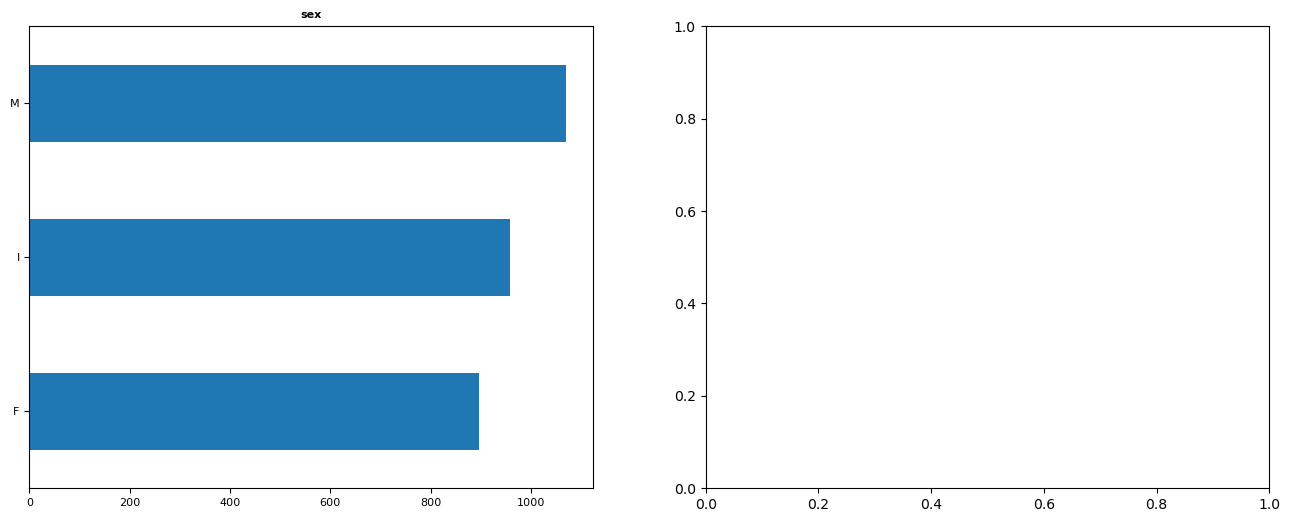

In [23]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
                
graficos_eda_categoricos(cat)

### Nulos

#### Identificación

In [24]:
cat.isna().sum().sort_values(ascending = False)

sex    0
dtype: int64

#### Corrección

No hay valores nulos

## GESTIÓN DE NUMÉRICAS

Estadísticos y gráficos variables numéricas

In [25]:
def estadisticos_cont(df_cont):
    #Calculamos describe
    estadisticos = df_cont.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df_cont.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
length,2924.0,0.521987,0.54000,0.121454,0.0750,0.450000,0.54000,0.615000,0.8000
diameter,2924.0,0.406214,0.42000,0.100285,0.0550,0.345000,0.42000,0.480000,0.6300
height,2924.0,0.138921,0.14000,0.043540,0.0000,0.110000,0.14000,0.165000,1.1300
whole_weight,2924.0,0.824775,0.79125,0.497582,0.0020,0.435000,0.79125,1.150625,2.8255
shucked_weight,2924.0,0.357429,0.33050,0.224392,0.0010,0.181875,0.33050,0.500125,1.3510
viscera_weight,2924.0,0.179945,0.16825,0.111178,0.0005,0.091000,0.16825,0.253125,0.7600
shell_weight,2924.0,0.236762,0.22925,0.140468,0.0015,0.125000,0.22925,0.325000,1.0050
rings,2924.0,9.935363,9.00000,3.262744,1.0000,8.000000,9.00000,11.000000,27.0000
age,2924.0,11.435363,10.50000,3.262744,2.5000,9.500000,10.50000,12.500000,28.5000


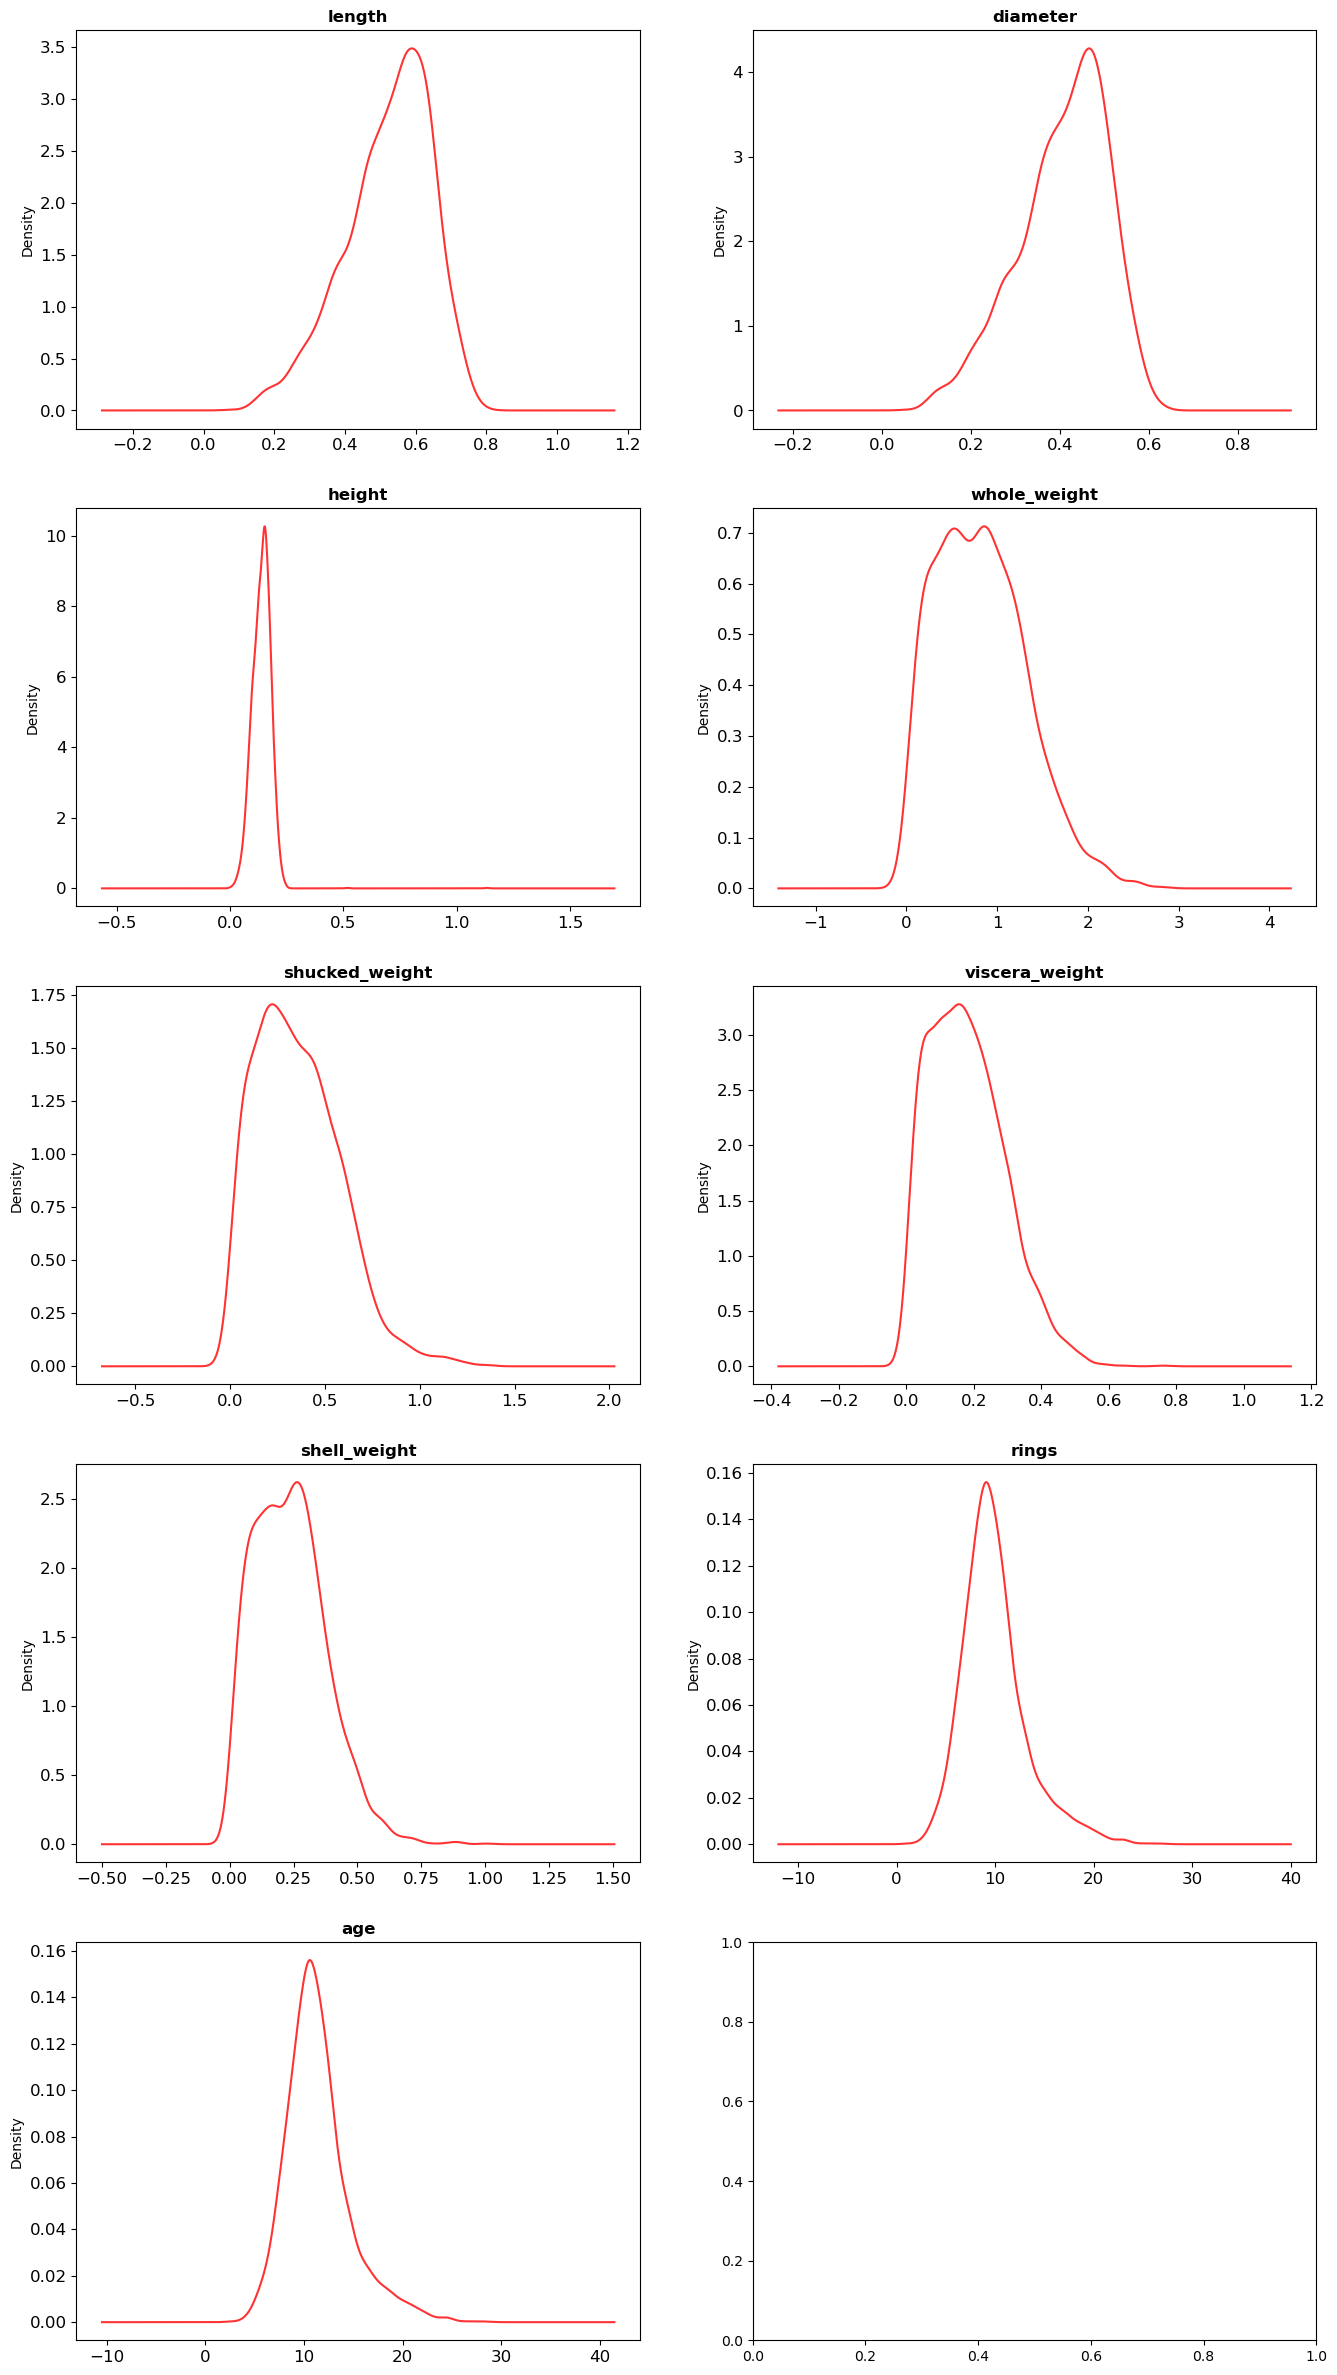

In [26]:
def graficos_eda_continuas(df_cont):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(df_cont.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
    
graficos_eda_continuas(num)

### Nulos

#### Identificación

In [27]:
num.isna().sum().sort_values(ascending = False)

length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age               0
dtype: int64

#### Corrección

No hay valores nulos en variables numéricas.

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [28]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [29]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [30]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [31]:
var_atipicos_dt = [ 'height',
                    'whole_weight',
                    'shucked_weight',
                    'viscera_weight',
                    'shell_weight',
                    'rings']

###### Aplicar

In [32]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


height:

0.515    1
1.130    1
Name: height, dtype: int64

whole_weight:

2.8255    1
Name: whole_weight, dtype: int64

shucked_weight:

1.3510    1
1.3485    1
Name: shucked_weight, dtype: int64

viscera_weight:

0.6415    1
0.7600    1
Name: viscera_weight, dtype: int64

shell_weight:

0.885    2
1.005    1
0.850    1
0.897    1
Name: shell_weight, dtype: int64

rings:

23    8
26    1
27    1
25    1
24    1
Name: rings, dtype: int64


##### Corrección

Eliminar los registros que tengan al menos un atípico en alguna de las variables indicadas.

###### Variables a aplicar

In [33]:
var_atipicos_dt = [ 'height',
                    'whole_weight',
                    'shucked_weight',
                    'viscera_weight',
                    'shell_weight',
                    'rings']

###### Aplicar

In [34]:
for variable in var_atipicos_dt:
    cat.drop(atipicos_desv_tip(num[variable], num_desv_tip),axis = 0, inplace = True)
    num.drop(atipicos_desv_tip(num[variable], num_desv_tip),axis = 0, inplace = True)

## VERIFICAR TAMAÑO DE LOS DATASETS

In [35]:
print('Categóricas:', cat.shape, 'registros')
print('Numéricas:', num.shape, 'registros')
print('Dataset_trabajo:', df.shape, 'registros')

Categóricas: (2903, 1) registros
Numéricas: (2903, 9) registros
Dataset_trabajo: (2924, 10) registros


## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [36]:
ruta_trabajo = data['ruta_proyecto'] + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = data['ruta_proyecto'] + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = data['ruta_proyecto'] + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [37]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)